# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


In [3]:
lats

array([ 46.36840489, -50.25960166,  36.41193323, ..., -56.18280875,
        -5.55823333,  19.83180141])

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp - 273.15,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | galgani
City not found. Skipping...
Processing Record 2 of Set 1 | nhulunbuy
Processing Record 3 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 1 | toulepleu
City not found. Skipping...
Processing Record 5 of Set 1 | rosaryville
Processing Record 6 of Set 1 | kantang
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | bambanglipuro
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | yuci
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | bluff
Pr

Processing Record 34 of Set 4 | walvis bay
Processing Record 35 of Set 4 | kruisfontein
Processing Record 36 of Set 4 | north bend
Processing Record 37 of Set 4 | kavieng
Processing Record 38 of Set 4 | ardakan
Processing Record 39 of Set 4 | havelock
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | mayo
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | vangaindrano
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | pavino
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | gasa
Processing Record 49 of Set 4 | hofn
Processing Record 0 of Set 5 | mae hong son
Processing Record 1 of Set 5 | praia da vitoria
Processing Record 2 of Set 5 | sorvag
City not found. Skipping...
Processing Record 3 of Set 5 | nortelandia
Processing Record 4 of Set 5 | gizo
Processing Record 5 of Set 5 | tasiilaq
Processing Record 6 of Set 5 | quanzhou
Processing Record 7 of Se

Processing Record 26 of Set 8 | palmer
Processing Record 27 of Set 8 | saldanha
Processing Record 28 of Set 8 | itoman
Processing Record 29 of Set 8 | tocopilla
Processing Record 30 of Set 8 | rajbiraj
Processing Record 31 of Set 8 | ouadda
Processing Record 32 of Set 8 | coahuayana
Processing Record 33 of Set 8 | thinadhoo
Processing Record 34 of Set 8 | nabire
Processing Record 35 of Set 8 | cahir
Processing Record 36 of Set 8 | tecoanapa
Processing Record 37 of Set 8 | gaoua
Processing Record 38 of Set 8 | wajima
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | fort nelson
Processing Record 41 of Set 8 | bombay
Processing Record 42 of Set 8 | taoudenni
Processing Record 43 of Set 8 | krasnogorskoye
Processing Record 44 of Set 8 | batagay-alyta
Processing Record 45 of Set 8 | phenix city
Processing Record 46 of Set 8 | bell ville
Processing Record 47 of Set 8 | nelson bay
Processing Record 48 of Set 8 | sal rei
Processing Record 49 of Set 8 | baiyin
Processing

Processing Record 15 of Set 12 | lahij
Processing Record 16 of Set 12 | ibadan
Processing Record 17 of Set 12 | narsaq
Processing Record 18 of Set 12 | jabiru
City not found. Skipping...
Processing Record 19 of Set 12 | kumba
Processing Record 20 of Set 12 | yagodnoye
Processing Record 21 of Set 12 | khovu-aksy
Processing Record 22 of Set 12 | cabo san lucas
Processing Record 23 of Set 12 | christchurch
Processing Record 24 of Set 12 | byron bay
Processing Record 25 of Set 12 | olinda
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | auki
Processing Record 28 of Set 12 | hobyo
Processing Record 29 of Set 12 | cap malheureux
Processing Record 30 of Set 12 | canchungo
Processing Record 31 of Set 12 | phulji
Processing Record 32 of Set 12 | iranshahr
Processing Record 33 of Set 12 | humberto de campos
Processing Record 34 of Set 12 | tubruq
City not found. Skipping...
Processing Record 35 of Set 12 | nassau
Processing Record 36 of Set 12 | santa cruz de tenerife
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nhulunbuy,-12.2333,136.7667,25.34,94,100,0.00,AU,1669830723
1,rosaryville,38.7568,-76.8097,13.34,93,100,7.20,US,1669830724
2,kantang,7.4054,99.5156,24.46,90,91,1.91,TH,1669830724
3,hilo,19.7297,-155.0900,26.82,86,40,2.57,US,1669830724
4,muros,42.7762,-9.0603,12.83,90,100,2.74,ES,1669830564


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nola,40.9220,14.5329,12.74,94,100,3.47,IT,1669771747
1,pozo colorado,-23.4923,-58.7972,26.56,52,14,3.27,PY,1669771747
2,rikitea,-23.1203,-134.9692,22.44,72,68,6.14,PF,1669771747
3,qaanaaq,77.4840,-69.3632,-27.36,81,19,2.79,GL,1669771748
4,gavirate,45.8401,8.7198,6.52,92,65,1.19,IT,1669771748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

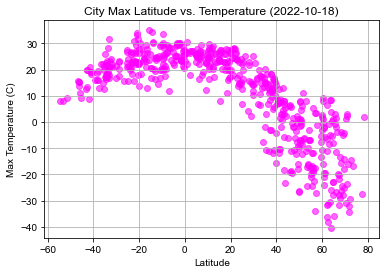

In [7]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", c='magenta', alpha=0.6)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

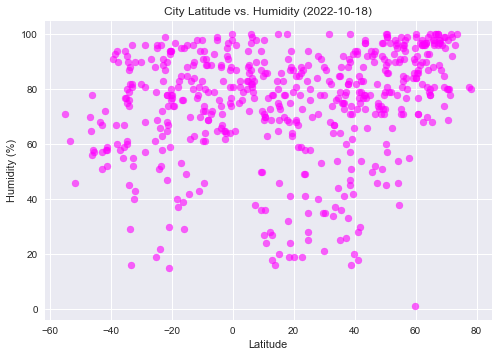

In [8]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",  c='magenta', alpha=0.6)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

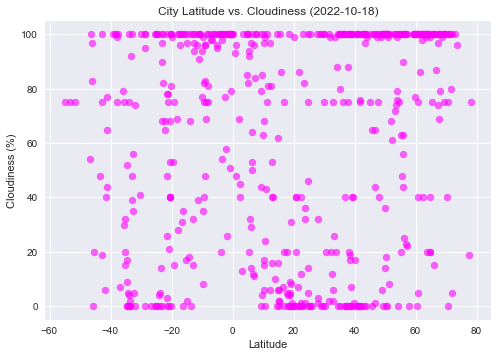

In [9]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",  c='magenta', alpha=0.6)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

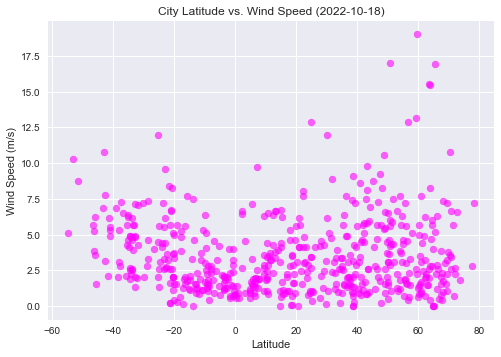

In [85]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", c='magenta', alpha=0.6)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.style.use('seaborn')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lin_reg(x_values, y_values, ylabel):
    x_values = x_values
    y_values = y_values
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values,  c='magenta', alpha=0.6)
#     plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="black")
    
    plt.style.use('seaborn')
    plt.xlabel('Latitude')
    plt.ylabel(f'{ylabel}')
    
    print(f"The r-value is {rvalue}")
    plt.show()   

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nola,40.9220,14.5329,12.74,94,100,3.47,IT,1669771747
3,qaanaaq,77.4840,-69.3632,-27.36,81,19,2.79,GL,1669771748
4,gavirate,45.8401,8.7198,6.52,92,65,1.19,IT,1669771748
5,ribeira grande,38.5167,-28.7000,16.54,90,17,0.89,PT,1669771748
6,albany,42.6001,-73.9662,0.91,77,100,1.69,US,1669771517


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pozo colorado,-23.4923,-58.7972,26.56,52,14,3.27,PY,1669771747
2,rikitea,-23.1203,-134.9692,22.44,72,68,6.14,PF,1669771747
7,quatre cocos,-20.2078,57.7625,22.27,76,81,3.36,MU,1669771749
8,punta arenas,-53.1500,-70.9167,8.06,61,75,10.29,CL,1669771749
10,ushuaia,-54.8000,-68.3000,7.81,71,75,5.14,AR,1669771750


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8418568327202266


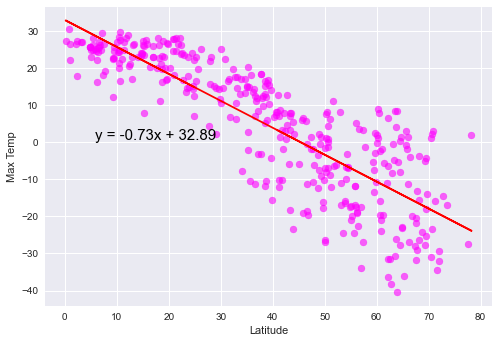

In [100]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp')

The r-value is 0.5896535708959568


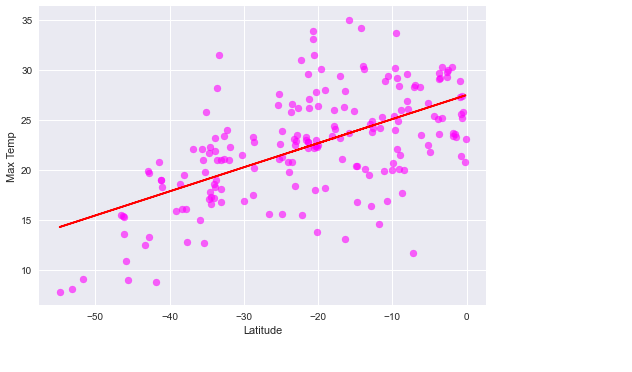

In [93]:
# Linear regression on Southern Hemisphere
# x_values = southern_hemi_df['Lat']
# y_values = southern_hemi_df['Max Temp']

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values,  c='magenta', alpha=0.6)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.style.use('seaborn')
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')

# print(f"The r-value is {rvalue}")
# plt.show()

lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.3023737006251158


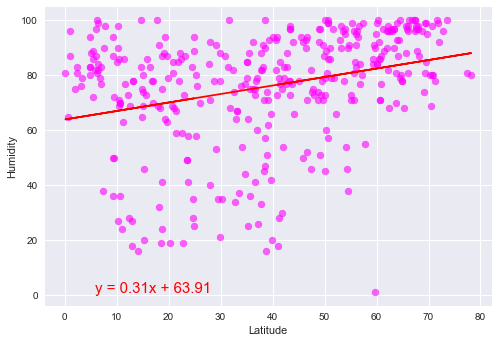

In [70]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity')

The r-value is 0.24508962247855046


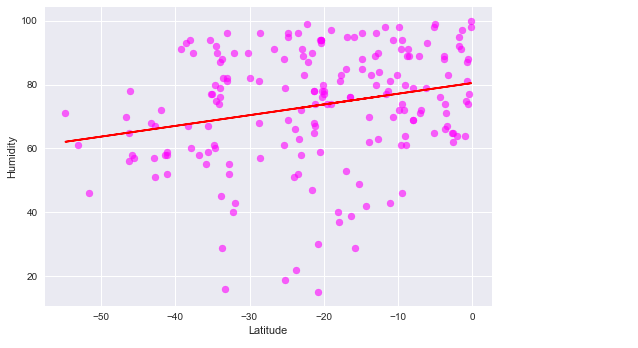

In [71]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.31330739526723594


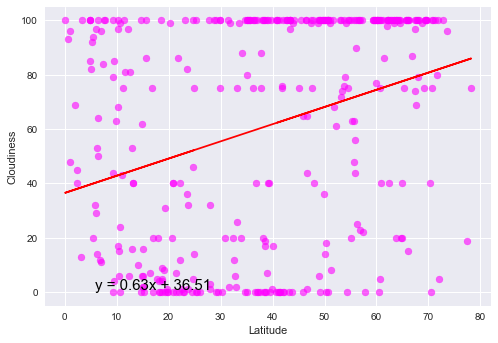

In [75]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness')

The r-value is 0.32153605044886


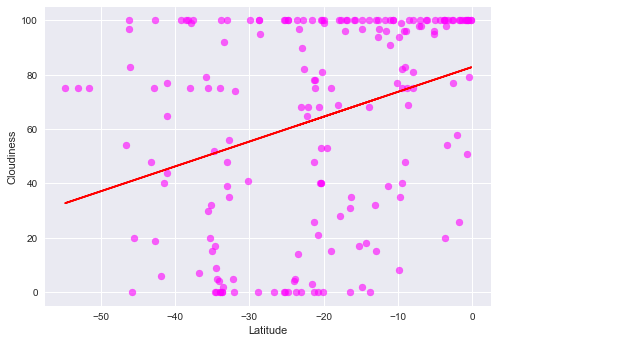

In [94]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.15078766263848498


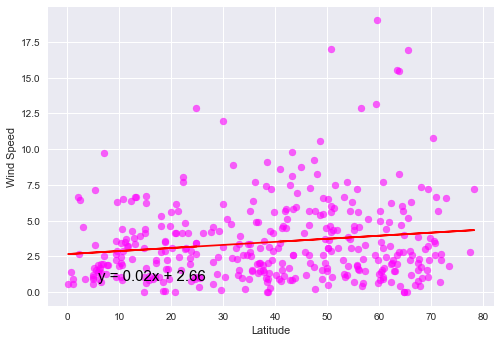

In [95]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed')

The r-value is -0.5118517655056691


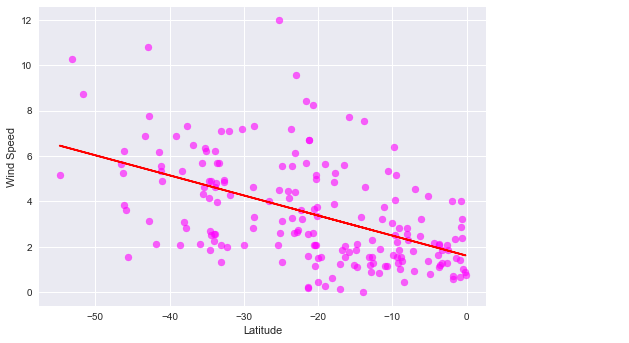

In [96]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE